In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | milkovo
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | muroto
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | karaul
City not found. Skipping...
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | tadine
Processing Record 20 of Set 1 | cedar city
Processing Record 21 of Set 1 | itatskiy
Processing Record 22 of Set 1 | zabid
Processing Record 2

Processing Record 38 of Set 4 | daugavpils
Processing Record 39 of Set 4 | nueva concepcion
Processing Record 40 of Set 4 | rosarito
Processing Record 41 of Set 4 | naze
Processing Record 42 of Set 4 | north platte
Processing Record 43 of Set 4 | najran
Processing Record 44 of Set 4 | morondava
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | show low
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | aasiaat
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | fomboni
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | ginda
Processing Record 3 of Set 5 | lamu
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | svetlogorsk
Processing Record 7 of Set 5 | diffa
Processing Record 8 of Set 5 | shestakovo
Processing Record 9 of Set 5 | vila franca do campo
Processing Record 10 of Set 5 | palana
Processing Record 11 of Set 5 | skhisma
Processi

Processing Record 29 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 30 of Set 8 | mandalgovi
Processing Record 31 of Set 8 | raudeberg
Processing Record 32 of Set 8 | zhuhai
Processing Record 33 of Set 8 | eureka
Processing Record 34 of Set 8 | kidal
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 37 of Set 8 | morro bay
Processing Record 38 of Set 8 | carnarvon
Processing Record 39 of Set 8 | otjiwarongo
Processing Record 40 of Set 8 | gamba
Processing Record 41 of Set 8 | verkhoyansk
Processing Record 42 of Set 8 | temaraia
City not found. Skipping...
Processing Record 43 of Set 8 | north bend
Processing Record 44 of Set 8 | aripuana
Processing Record 45 of Set 8 | areosa
Processing Record 46 of Set 8 | santa maria del oro
Processing Record 47 of Set 8 | calama
Processing Record 48 of Set 8 | malangali
Processing Record 49 of Set 8 | urumqi
Processing Rec

City not found. Skipping...
Processing Record 14 of Set 12 | zaporizhzhya
Processing Record 15 of Set 12 | katherine
Processing Record 16 of Set 12 | san patricio
Processing Record 17 of Set 12 | sydney
Processing Record 18 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 19 of Set 12 | svetlyy
Processing Record 20 of Set 12 | chuzhou
Processing Record 21 of Set 12 | molina
Processing Record 22 of Set 12 | zhigansk
Processing Record 23 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 24 of Set 12 | wundanyi
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | huarmey
Processing Record 27 of Set 12 | kishtwar
Processing Record 28 of Set 12 | rebrikha
Processing Record 29 of Set 12 | weligama
Processing Record 30 of Set 12 | coahuayana
Processing Record 31 of Set 12 | duobao
Processing Record 32 of Set 12 | college
Processing Record 33 of Set 12 | abrau-dyurso
Processing Record 34 of Set 12 | bolshoye pikino
City not f

In [12]:
len(city_data)

572

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.13,64,46,7.18,PF,2022-06-13 21:59:17
1,Namibe,-15.1961,12.1522,66.49,66,0,7.58,AO,2022-06-13 22:02:58
2,Mataura,-46.1927,168.8643,43.48,93,97,13.80,NZ,2022-06-13 21:59:04
3,Milkovo,54.7167,158.6167,48.24,83,100,3.13,RU,2022-06-13 22:02:59
4,Port Elizabeth,-33.9180,25.5701,68.09,55,100,6.24,ZA,2022-06-13 22:01:34
5,Saldanha,-33.0117,17.9442,58.14,83,97,20.09,ZA,2022-06-13 22:02:59
6,Bluff,-46.6000,168.3333,41.81,69,100,37.80,NZ,2022-06-13 22:03:00
7,Castro,-24.7911,-50.0119,46.00,79,0,3.04,BR,2022-06-13 21:59:10
8,Tuktoyaktuk,69.4541,-133.0374,35.60,93,40,13.80,CA,2022-06-13 22:01:49
9,Bredasdorp,-34.5322,20.0403,55.18,83,100,9.78,ZA,2022-06-13 21:59:05


In [19]:
cols = list(city_data_df.columns.values)
cols

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [20]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [25]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-06-13 21:59:17,-23.1203,-134.9692,73.13,64,46,7.18
1,Namibe,AO,2022-06-13 22:02:58,-15.1961,12.1522,66.49,66,0,7.58
2,Mataura,NZ,2022-06-13 21:59:04,-46.1927,168.8643,43.48,93,97,13.80
3,Milkovo,RU,2022-06-13 22:02:59,54.7167,158.6167,48.24,83,100,3.13
4,Port Elizabeth,ZA,2022-06-13 22:01:34,-33.9180,25.5701,68.09,55,100,6.24
5,Saldanha,ZA,2022-06-13 22:02:59,-33.0117,17.9442,58.14,83,97,20.09
6,Bluff,NZ,2022-06-13 22:03:00,-46.6000,168.3333,41.81,69,100,37.80
7,Castro,BR,2022-06-13 21:59:10,-24.7911,-50.0119,46.00,79,0,3.04
8,Tuktoyaktuk,CA,2022-06-13 22:01:49,69.4541,-133.0374,35.60,93,40,13.80
9,Bredasdorp,ZA,2022-06-13 21:59:05,-34.5322,20.0403,55.18,83,100,9.78


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

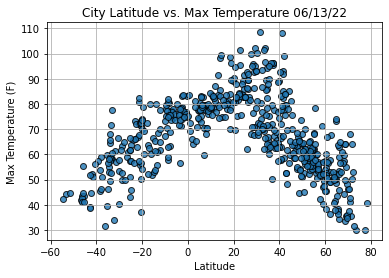

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

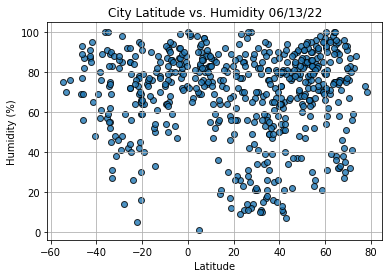

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

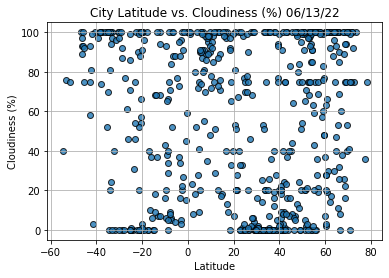

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

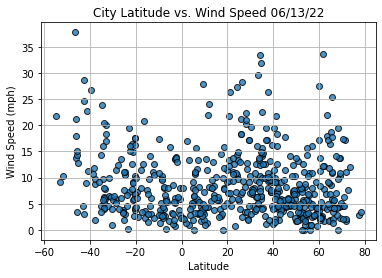

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()